In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ekplorasi Data & Preprocessing

In [2]:
df = pd.read_csv('Youtube-Spam-Dataset.csv')

In [3]:
print(f"Total jumlah baris dan kolom dalam dataset:", df.shape)

Total jumlah baris dan kolom dalam dataset: (1956, 6)


In [4]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   VIDEO_NAME  1956 non-null   object
 5   CLASS       1956 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 91.8+ KB


In [6]:
df.describe()

,CLASS
count,1956.000000
mean,0.513804
std,0.499937
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
print(df.isnull().sum())

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
VIDEO_NAME      0
CLASS           0
dtype: int64


In [8]:
df = df.drop_duplicates()
print("Duplicate Values:\n", df.duplicated().sum())

Duplicate Values:
 0


In [9]:
print("\nDistribusi kelas (Spam: 1, Ham/Non-Spam: 0):")
print(df['CLASS'].value_counts())


Distribusi kelas (Spam: 1, Ham/Non-Spam: 0):
CLASS
1    1003
0     950
Name: count, dtype: int64


# Visualisasi distribusi kelas

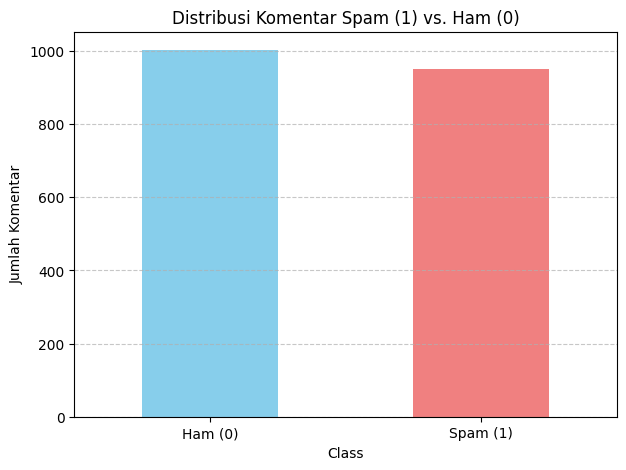

In [10]:
plt.figure(figsize=(7, 5))
df['CLASS'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribusi Komentar Spam (1) vs. Ham (0)')
plt.xlabel('Class')
plt.ylabel('Jumlah Komentar')
plt.xticks(ticks=[0, 1], labels=['Ham (0)', 'Spam (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pembersihan Teks & Tokenisasi

In [11]:
print("\nMelakukan pembersihan teks dan tokenisasi manual...")
def preprocess_text_manual(text):
    # Memeriksa apakah input adalah string. Jika bukan, konversi ke string kosong atau tangani sesuai kebutuhan.
    if not isinstance(text, str):
        text = str(text) # Konversi ke string jika bukan

    # Lowercasing
    text = text.lower()
    # Hapus karakter non-alfabetik (selain huruf dan spasi)
    cleaned_text = ''.join(char for char in text if 'a' <= char <= 'z' or char.isspace())
    # Tokenisasi manual dengan memisahkan berdasarkan spasi
    tokens = cleaned_text.split()
    return tokens

# Fungsi preprocessing ke kolom 'CONTENT'
# .astype(str) untuk memastikan semua entri adalah string sebelum diproses
df['PROCESSED_CONTENT'] = df['CONTENT'].astype(str).apply(preprocess_text_manual)

print("\nContoh komentar asli dan setelah preprocessing:")
# Memastikan indeks yang diambil ada dan bukan NaN
if len(df) > 0:
    print(f"Asli: {df['CONTENT'].iloc[0]}")
    print(f"Diproses: {df['PROCESSED_CONTENT'].iloc[0]}")
else:
    print("Dataset kosong, tidak ada contoh komentar untuk ditampilkan.")


Melakukan pembersihan teks dan tokenisasi manual...

Contoh komentar asli dan setelah preprocessing:
Asli: Huh, anyway check out this you[tube] channel: kobyoshi02
Diproses: ['huh', 'anyway', 'check', 'out', 'this', 'youtube', 'channel', 'kobyoshi']


# Split Data (Manual Train-Test Split)

In [12]:
print("\nMembagi dataset menjadi data training dan testing secara manual...")
# Dapatkan indeks data
indices = np.arange(len(df))
np.random.shuffle(indices) # Acak indeks

train_size = int(0.8 * len(df)) # 80% untuk training
train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Memisahkan data komentar dan label berdasarkan indeks yang sudah diacak
X_train_comments = [df['PROCESSED_CONTENT'].iloc[i] for i in train_indices]
y_train = [df['CLASS'].iloc[i] for i in train_indices]
X_test_comments = [df['PROCESSED_CONTENT'].iloc[i] for i in test_indices]
y_test = [df['CLASS'].iloc[i] for i in test_indices]

print(f"Ukuran df training: {len(X_train_comments)} komentar")
print(f"Ukuran df testing: {len(X_test_comments)} komentar")


Membagi dataset menjadi data training dan testing secara manual...
Ukuran df training: 1562 komentar
Ukuran df testing: 391 komentar


# Membangun Kosakata & Feature Extraction (Manual Bag-of-Words)

In [13]:
print("\nMembangun kosakata dan fungsi feature extraction manual (Bag-of-Words)...")
# Membangun kosakata dari data training
vocabulary = {}
word_index = 0
for tokens in X_train_comments:
    for token in tokens:
        if token not in vocabulary:
            vocabulary[token] = word_index
            word_index += 1

print(f"Ukuran kosakata unik (dari data training): {len(vocabulary)} kata")
# print(f"Beberapa contoh kata dalam kosakata: {list(vocabulary.keys())[:10]}") # Untuk debugging

# Fungsi untuk membuat vektor Bag-of-Words (frekuensi)
def create_bow_vector_manual(tokens, vocab):
    vector = np.zeros(len(vocab))
    for token in tokens:
        if token in vocab:
            vector[vocab[token]] += 1
    return vector

# Fungsi untuk membuat vektor Bag-of-Words (biner - kehadiran)
def create_binary_bow_vector_manual(tokens, vocab):
    vector = np.zeros(len(vocab))
    for token in tokens:
        if token in vocab:
            vector[vocab[token]] = 1 # 1 jika ada, 0 jika tidak
    return vector


Membangun kosakata dan fungsi feature extraction manual (Bag-of-Words)...
Ukuran kosakata unik (dari data training): 3465 kata


# Pembangungan ModelBaseline

In [14]:
print("\n--- Memulai Tahap Pembangunan Model dan Eksplorasi ---")

# Implementasi Naive Bayes Classifier secara manual
class ManualNaiveBayes:
    def __init__(self, alpha=1.0, model_type='multinomial'):
        self.alpha = alpha # Parameter Laplace smoothing
        self.model_type = model_type # 'multinomial' atau 'bernoulli'
        self.class_priors = {} # P(Class)
        self.word_probabilities = {} # P(word|Class)
        self.vocabulary = None
        self.unique_classes = []

    def fit(self, X_comments, y, vocabulary):
        self.vocabulary = vocabulary
        self.unique_classes = sorted(list(set(y)))
        num_samples = len(X_comments)

        # Inisialisasi hitungan untuk setiap kata di setiap kelas
        word_counts_per_class = {c: np.zeros(len(vocabulary)) for c in self.unique_classes}
        class_counts = {c: 0 for c in self.unique_classes}

        for i in range(num_samples):
            current_class = y[i]
            class_counts[current_class] += 1

            # Buat vektor fitur tergantung pada tipe model
            if self.model_type == 'multinomial':
                vector = create_bow_vector_manual(X_comments[i], self.vocabulary)
            elif self.model_type == 'bernoulli':
                vector = create_binary_bow_vector_manual(X_comments[i], self.vocabulary)
            else:
                raise ValueError("model_type harus 'multinomial' atau 'bernoulli'")

            word_counts_per_class[current_class] += vector

        # Hitung probabilitas prior P(C)
        for c in self.unique_classes:
            self.class_priors[c] = class_counts[c] / num_samples

        # Hitung probabilitas likelihood P(word|C) dengan Laplace Smoothing
        for c in self.unique_classes:
            if self.model_type == 'multinomial':
                # Untuk Multinomial, total kata di kelas C + (alpha * ukuran_vocab)
                total_words_in_class_c = np.sum(word_counts_per_class[c]) + self.alpha * len(vocabulary)
                # Pastikan total_words_in_class_c tidak nol
                if total_words_in_class_c == 0:
                    self.word_probabilities[c] = np.zeros(len(vocabulary)) # Hindari pembagian nol
                else:
                    self.word_probabilities[c] = (word_counts_per_class[c] + self.alpha) / total_words_in_class_c
            elif self.model_type == 'bernoulli':
                # Untuk Bernoulli, P(word|C) = (jumlah dokumen kelas C yang mengandung kata + alpha) / (jumlah dokumen kelas C + 2*alpha)
                num_docs_in_class_c = class_counts[c]
                denominator = (num_docs_in_class_c + 2 * self.alpha)
                if denominator == 0:
                    self.word_probabilities[c] = np.zeros(len(vocabulary)) # Hindari pembagian nol
                else:
                    self.word_probabilities[c] = (word_counts_per_class[c] + self.alpha) / denominator

    def predict(self, X_comments):
        predictions = []
        for tokens in X_comments:
            # Inisialisasi skor log-posterior untuk setiap kelas (mulai dengan log prior)
            scores = {c: np.log(self.class_priors[c]) for c in self.unique_classes}

            # Buat vektor fitur untuk komentar saat ini (sesuai model_type)
            comment_vector = None
            if self.model_type == 'multinomial':
                comment_vector = create_bow_vector_manual(tokens, self.vocabulary)
            elif self.model_type == 'bernoulli':
                comment_vector = create_binary_bow_vector_manual(tokens, self.vocabulary)

            # Hitung skor log-likelihood untuk setiap kata
            for c in scores:
                for i, feature_value in enumerate(comment_vector):
                    if i < len(self.vocabulary): # Pastikan indeks valid
                        word_prob = self.word_probabilities[c][i]

                        if self.model_type == 'multinomial':
                            # Tambahkan log(P(word|class)) * frekuensi kata
                            # Tambah epsilon untuk hindari log(0) jika word_prob sangat kecil
                            scores[c] += feature_value * np.log(word_prob + 1e-9)
                        elif self.model_type == 'bernoulli':
                            # Jika kata ada, tambahkan log(P(word|class))
                            if feature_value > 0: # Word is present
                                scores[c] += np.log(word_prob + 1e-9)
                            # Jika kata tidak ada, tambahkan log(1 - P(word|class))
                            else: # Word is not present
                                scores[c] += np.log(1 - word_prob + 1e-9)

            # Pilih kelas dengan skor log-posterior tertinggi
            predicted_class = max(scores, key=scores.get)
            predictions.append(predicted_class)
        return predictions
    
model_mnb_baseline = ManualNaiveBayes(alpha=1.0, model_type='multinomial')
model_mnb_baseline.fit(X_train_comments, y_train, vocabulary)
predictions_mnb_baseline = model_mnb_baseline.predict(X_test_comments)
print(f"Contoh prediksi Manual Naive Bayes: {predictions_mnb_baseline[:10]}")


--- Memulai Tahap Pembangunan Model dan Eksplorasi ---
Contoh prediksi Manual Naive Bayes: [0, 1, 1, 1, 0, 1, 1, 1, 1, 1]


# Membangun 3 Skema Model

In [15]:
print("\n--- Training Bernoulli Naive Bayes dengan Hyperparameter Tuning ---")

# Fungsi buat vektor fitur biner dari token (sesuai vocabulary)
def create_binary_feature_matrix(token_lists, vocab):
    matrix = np.zeros((len(token_lists), len(vocab)), dtype=int)
    for i, tokens in enumerate(token_lists):
        for token in tokens:
            if token in vocab:
                matrix[i, vocab[token]] = 1
    return matrix

# Fungsi training Bernoulli Naive Bayes
def train_bernoulli_nb(X, y, alpha=1.0):
    n_samples, n_features = X.shape
    classes = np.unique(y)
    class_priors = {}
    feature_probs = {}

    for c in classes:
        X_c = X[y == c]
        class_priors[c] = len(X_c) / n_samples
        feature_probs[c] = (np.sum(X_c, axis=0) + alpha) / (X_c.shape[0] + 2 * alpha)
    
    return class_priors, feature_probs

# Fungsi prediksi Bernoulli Naive Bayes
def predict_bernoulli_nb(X, class_priors, feature_probs):
    predictions = []
    epsilon = 1e-9  
    for x in X:
        log_probs = {}
        for c in class_priors:
            log_prob = np.log(class_priors[c] + epsilon)
            probs = feature_probs[c]
            log_prob += np.sum(x * np.log(probs + epsilon) + (1 - x) * np.log(1 - probs + epsilon))
            log_probs[c] = log_prob
        predictions.append(max(log_probs, key=log_probs.get))
    return np.array(predictions)

# Membuat fitur biner untuk train dan test
X_train_bin = create_binary_feature_matrix(X_train_comments, vocabulary)
X_test_bin = create_binary_feature_matrix(X_test_comments, vocabulary)

alphas = [0.01, 0.1, 1.0, 5.0, 10.0]
bernoulli_results = []

# Variabel untuk menyimpan hasil prediksi tiap alpha
y_pred_alpha_001 = y_pred_alpha_01 = y_pred_alpha_1 = y_pred_alpha_5 = y_pred_alpha_10 = None

for alpha in alphas:
    class_priors, feature_probs = train_bernoulli_nb(X_train_bin, np.array(y_train), alpha=alpha)
    y_pred = predict_bernoulli_nb(X_test_bin, class_priors, feature_probs)

    # Simpan hasil untuk evaluasi
    bernoulli_results.append((alpha, y_pred))

    # Simpan ke variabel khusus jika alpha cocok
    if alpha == 0.01:
        y_pred_alpha_001 = y_pred
    elif alpha == 0.1:
        y_pred_alpha_01 = y_pred
    elif alpha == 1.0:
        y_pred_alpha_1 = y_pred
    elif alpha == 5.0:
        y_pred_alpha_5 = y_pred
    elif alpha == 10.0:
        y_pred_alpha_10 = y_pred

print("Training Bernoulli Naive Bayes selesai untuk alphas:", alphas)

# Contoh akses hasil prediksi untuk alpha tertentu (misal alpha=1.0)
print(f"Contoh prediksi untuk alpha=1.0: {y_pred_alpha_1[:10]}")



--- Training Bernoulli Naive Bayes dengan Hyperparameter Tuning ---
Training Bernoulli Naive Bayes selesai untuk alphas: [0.01, 0.1, 1.0, 5.0, 10.0]
Contoh prediksi untuk alpha=1.0: [0 1 0 1 0 1 1 1 1 1]


In [16]:
print("\n--- Training Logistic Regression dengan Hyperparameter Tuning ---")

# Fungsi sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Fungsi buat matriks fitur Bag-of-Words frekuensi (multinomial BOW)
def create_bow_feature_matrix(token_lists, vocab):
    matrix = np.zeros((len(token_lists), len(vocab)), dtype=float)
    for i, tokens in enumerate(token_lists):
        for token in tokens:
            if token in vocab:
                matrix[i, vocab[token]] += 1
    return matrix

# Training Logistic Regression manual
def train_logistic_regression(X, y, learning_rate=0.01, n_epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(n_epochs):
        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)

        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# Prediksi Logistic Regression
def predict_logistic_regression(X, weights, bias, threshold=0.5):
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    return np.where(y_predicted >= threshold, 1, 0)

# Membuat fitur BOW frekuensi (sesuai vocabulary)
X_train_vec = create_bow_feature_matrix(X_train_comments, vocabulary)
X_test_vec = create_bow_feature_matrix(X_test_comments, vocabulary)

# Hyperparameter tuning (learning rate & epochs)
lr_rates = [0.001, 0.01, 0.1]
epochs_list = [500, 1000, 2000]
logreg_results = []

for lr in lr_rates:
    for epochs in epochs_list:
        weights, bias = train_logistic_regression(X_train_vec, np.array(y_train), learning_rate=lr, n_epochs=epochs)
        y_pred = predict_logistic_regression(X_test_vec, weights, bias)
        logreg_results.append((lr, epochs, y_pred))

print("Training Logistic Regression selesai untuk kombinasi learning rate dan epochs.")

# Menampilkan contoh prediksi untuk lr=0.01 dan epochs=1000
idx = [(lr, ep) for lr in lr_rates for ep in epochs_list].index((0.01, 1000))
print(f"Contoh prediksi untuk lr=0.01 dan epochs=1000: {logreg_results[idx][2][:10]}")



--- Training Logistic Regression dengan Hyperparameter Tuning ---
Training Logistic Regression selesai untuk kombinasi learning rate dan epochs.
Contoh prediksi untuk lr=0.01 dan epochs=1000: [0 1 1 1 0 1 1 1 1 1]


In [17]:
print("\n--- Training Perceptron dengan Hyperparameter Tuning ---")

# Fungsi aktivasi step (threshold)
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Training Perceptron manual
def train_perceptron(X, y, learning_rate=0.01, n_epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for epoch in range(n_epochs):
        for idx in range(n_samples):
            linear_output = np.dot(X[idx], weights) + bias
            y_pred = step_function(linear_output)
            update = learning_rate * (y[idx] - y_pred)
            weights += update * X[idx]
            bias += update
    return weights, bias

# Prediksi Perceptron
def predict_perceptron(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return step_function(linear_output)


X_train_vec = create_bow_feature_matrix(X_train_comments, vocabulary)
X_test_vec = create_bow_feature_matrix(X_test_comments, vocabulary)

# Hyperparameter tuning learning rate dan epochs
lr_rates = [0.001, 0.01, 0.1]
epochs_list = [500, 1000, 2000]
perceptron_results = []

for lr in lr_rates:
    for epochs in epochs_list:
        weights, bias = train_perceptron(X_train_vec, np.array(y_train), learning_rate=lr, n_epochs=epochs)
        y_pred = predict_perceptron(X_test_vec, weights, bias)
        perceptron_results.append((lr, epochs, y_pred))

print("Training Perceptron selesai untuk semua kombinasi learning rate dan epochs.")

# Menampilkan contoh prediksi untuk lr=0.01 dan epochs=1000
idx = [(lr, ep) for lr in lr_rates for ep in epochs_list].index((0.01, 1000))
print(f"Contoh prediksi Perceptron untuk lr=0.01 dan epochs=1000: {perceptron_results[idx][2][:10]}")



--- Training Perceptron dengan Hyperparameter Tuning ---
Training Perceptron selesai untuk semua kombinasi learning rate dan epochs.
Contoh prediksi Perceptron untuk lr=0.01 dan epochs=1000: [0 1 1 1 0 1 1 1 1 1]


# Evaluasi Model

In [18]:
print("\n--- Memulai Tahap Evaluasi Model ---")

# Fungsi evaluasi metrik manual
def calculate_metrics(y_true, y_pred):
    true_positives = true_negatives = false_positives = false_negatives = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positives += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            true_negatives += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            false_positives += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_negatives += 1

    accuracy = (true_positives + true_negatives) / len(y_true)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score, true_positives, true_negatives, false_positives, false_negatives



--- Memulai Tahap Evaluasi Model ---


In [19]:
print("\n--- Memulai Evaluasi Semua Model dari Semua Kombinasi Hyperparameter ---")

acc1, prec1, rec1, f1_1, tp1, tn1, fp1, fn1 = calculate_metrics(y_test, predictions_mnb_baseline)
print(f"\n--- Hasil Evaluasi Model 1 (Multinomial Naive Bayes Baseline) ---")
print(f"Akurasi: {acc1:.4f} | Presisi: {prec1:.4f} | Recall: {rec1:.4f} | F1-Score: {f1_1:.4f}")
print(f"Confusion Matrix: TP={tp1}, TN={tn1}, FP={fp1}, FN={fn1}")

# Buat list hasil prediksi Bernoulli Naive Bayes dari alpha yang berbeda
bnb_results = [
    (0.01, y_pred_alpha_001),
    (0.1, y_pred_alpha_01),
    (1.0, y_pred_alpha_1),
    (5.0, y_pred_alpha_5),
    (10.0, y_pred_alpha_10)
]

best_bnb = None
best_f1_bnb = -1

for alpha, y_pred in bnb_results:
    acc, prec, rec, f1, tp, tn, fp, fn = calculate_metrics(y_test, y_pred)
    if f1 > best_f1_bnb:
        best_f1_bnb = f1
        best_bnb = (alpha, acc, prec, rec, f1, tp, tn, fp, fn)

print("\n--- Hasil Terbaik Model 2 (Bernoulli Naive Bayes) ---")
print(f"Alpha: {best_bnb[0]}")
print(f"Akurasi: {best_bnb[1]:.4f} | Presisi: {best_bnb[2]:.4f} | Recall: {best_bnb[3]:.4f} | F1-Score: {best_bnb[4]:.4f}")
print(f"Confusion Matrix: TP={best_bnb[5]}, TN={best_bnb[6]}, FP={best_bnb[7]}, FN={best_bnb[8]}")

best_logreg = None
best_f1_logreg = -1

for i, (lr, epochs, y_pred) in enumerate(logreg_results):
    acc, prec, rec, f1, tp, tn, fp, fn = calculate_metrics(y_test, y_pred)
    if f1 > best_f1_logreg:
        best_f1_logreg = f1
        best_logreg = (lr, epochs, acc, prec, rec, f1, tp, tn, fp, fn)

print("\n--- Hasil Terbaik Model 3 (Logistic Regression Manual) ---")
print(f"Learning Rate: {best_logreg[0]} | Epochs: {best_logreg[1]}")
print(f"Akurasi: {best_logreg[2]:.4f} | Presisi: {best_logreg[3]:.4f} | Recall: {best_logreg[4]:.4f} | F1-Score: {best_logreg[5]:.4f}")
print(f"Confusion Matrix: TP={best_logreg[6]}, TN={best_logreg[7]}, FP={best_logreg[8]}, FN={best_logreg[9]}")

best_perceptron = None
best_f1_perceptron = -1

for i, (lr, epochs, y_pred) in enumerate(perceptron_results):
    acc, prec, rec, f1, tp, tn, fp, fn = calculate_metrics(y_test, y_pred)
    if f1 > best_f1_perceptron:
        best_f1_perceptron = f1
        best_perceptron = (lr, epochs, acc, prec, rec, f1, tp, tn, fp, fn)

print("\n--- Hasil Terbaik Model 4 (Perceptron Manual) ---")
print(f"Learning Rate: {best_perceptron[0]} | Epochs: {best_perceptron[1]}")
print(f"Akurasi: {best_perceptron[2]:.4f} | Presisi: {best_perceptron[3]:.4f} | Recall: {best_perceptron[4]:.4f} | F1-Score: {best_perceptron[5]:.4f}")
print(f"Confusion Matrix: TP={best_perceptron[6]}, TN={best_perceptron[7]}, FP={best_perceptron[8]}, FN={best_perceptron[9]}")



--- Memulai Evaluasi Semua Model dari Semua Kombinasi Hyperparameter ---

--- Hasil Evaluasi Model 1 (Multinomial Naive Bayes Baseline) ---
Akurasi: 0.8977 | Presisi: 0.8455 | Recall: 0.9688 | F1-Score: 0.9029
Confusion Matrix: TP=186, TN=165, FP=34, FN=6

--- Hasil Terbaik Model 2 (Bernoulli Naive Bayes) ---
Alpha: 0.01
Akurasi: 0.8696 | Presisi: 0.9434 | Recall: 0.7812 | F1-Score: 0.8547
Confusion Matrix: TP=150, TN=190, FP=9, FN=42

--- Hasil Terbaik Model 3 (Logistic Regression Manual) ---
Learning Rate: 0.1 | Epochs: 2000
Akurasi: 0.8875 | Presisi: 0.9684 | Recall: 0.7969 | F1-Score: 0.8743
Confusion Matrix: TP=153, TN=194, FP=5, FN=39

--- Hasil Terbaik Model 4 (Perceptron Manual) ---
Learning Rate: 0.1 | Epochs: 500
Akurasi: 0.9079 | Presisi: 0.9432 | Recall: 0.8646 | F1-Score: 0.9022
Confusion Matrix: TP=166, TN=189, FP=10, FN=26


# Visualisasi Perbandingan Metrik (jika Matplotlib diizinkan)

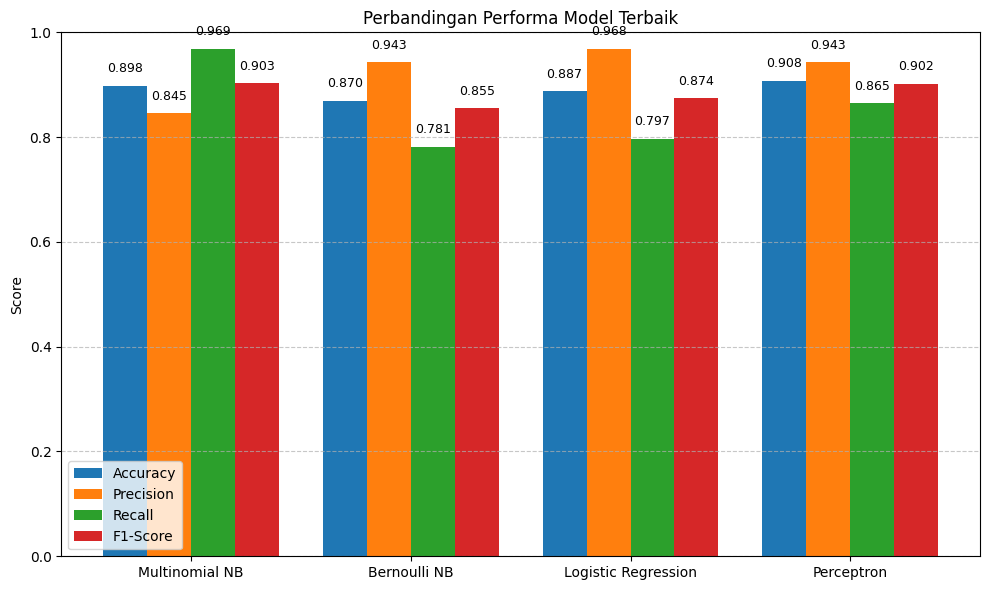

In [20]:
model_names = ['Multinomial NB', 'Bernoulli NB', 'Logistic Regression', 'Perceptron']
accuracies = [acc1, best_bnb[1], best_logreg[2], best_perceptron[2]]
precisions = [prec1, best_bnb[2], best_logreg[3], best_perceptron[3]]
recalls = [rec1, best_bnb[3], best_logreg[4], best_perceptron[4]]
f1_scores = [f1_1, best_bnb[4], best_logreg[5], best_perceptron[5]]

x = range(len(model_names))
width = 0.2

plt.figure(figsize=(10,6))
bars_acc = plt.bar([p - 1.5*width for p in x], accuracies, width, label='Accuracy')
bars_prec = plt.bar([p - 0.5*width for p in x], precisions, width, label='Precision')
bars_rec = plt.bar([p + 0.5*width for p in x], recalls, width, label='Recall')
bars_f1 = plt.bar([p + 1.5*width for p in x], f1_scores, width, label='F1-Score')

plt.xticks(x, model_names)
plt.ylabel('Score')
plt.title('Perbandingan Performa Model Terbaik')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                 f'{height:.3f}', ha='center', va='bottom', fontsize=9)

autolabel(bars_acc)
autolabel(bars_prec)
autolabel(bars_rec)
autolabel(bars_f1)

plt.tight_layout()
plt.show()


# Testing manual

In [21]:
print("\n--- Sistem Prediksi Komentar Spam (Command Line Interface) ---")

best_model = model_mnb_baseline

print("\nSilakan masukkan komentar YouTube untuk diprediksi.")
print("Ketik 'exit' untuk keluar dari program.")

while True:
    user_comment = input("\nKomentar Anda: ")
    if user_comment.lower() == 'exit':
        break

    # Preprocessing komentar yang dimasukkan pengguna
    processed_user_comment = preprocess_text_manual(user_comment)

    # Prediksi menggunakan model terbaik
    # Metode predict() di ManualNaiveBayes class mengambil list of comments,
    # jadi masukkan processed_user_comment dalam list.
    prediction_result = best_model.predict([processed_user_comment])[0]

    if prediction_result == 1:
        print("Prediksi: KOMENTAR INI KEMUNGKINAN SPAM.")
    else:
        print("Prediksi: KOMENTAR INI KEMUNGKINAN BUKAN SPAM (HAM).")

print("\nTerima kasih telah menggunakan sistem deteksi spam!")


--- Sistem Prediksi Komentar Spam (Command Line Interface) ---

Silakan masukkan komentar YouTube untuk diprediksi.
Ketik 'exit' untuk keluar dari program.

Terima kasih telah menggunakan sistem deteksi spam!
